In [11]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install IPython
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install nltk

# Import modules and cleaning the dataset

In [12]:
# modules that need to be installed
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
from ipywidgets import widgets, Layout
from IPython.display import display, HTML

In [13]:
# style for the output
style = """
    <style>
       .jupyter-widgets-output-area .output_scroll {
            height: unset !important;
            border-radius: unset !important;
            -webkit-box-shadow: unset !important;
            box-shadow: unset !important;
        }
        .jupyter-widgets-output-area  {
            height: auto !important;
        }
    </style>
    """
display(HTML(style))

In [14]:
# load the csv file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/52685-project/vaccination_tweets.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [16]:
# count how many null values
display(df.isnull().sum())
# check the duplicated values
print('Duplicated values = ', str(df.duplicated().any()))


id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

Duplicated values =  False


In [17]:
# replace all the missing data by zero
df = df.fillna(0)
df.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [18]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,0,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,0,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",0,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,0,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",0,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [19]:
# download the vader_lexicon from nltk
nltk.download('vader_lexicon')
s = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [20]:
# add sentiment array
sentiment = []
for i in df['text'].values:
    if s.polarity_scores(i)['compound'] >= 0.05:
        sentiment.append('Positive')
    elif s.polarity_scores(i)['compound'] <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

In [21]:
# add column
df['sentiment'] = sentiment

In [22]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,0,Twitter Web App,1,1,False,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",0,Twitter Web App,446,2129,False,Neutral
4,1337854064604966912,Citizen News Channel,0,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",0,Twitter Web App,2,6,False,Positive
11016,1460809350792896516,Sujan,0,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False,Neutral
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",0,Twitter Web App,3,5,False,Positive
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,Positive


# Visualisation of Sentiment Analysis

In [23]:
# group by sentiment
sentiment_group = df.groupby(['sentiment'])['id'].count().reset_index()
sentiment_group

,sentiment,id
0,Negative,1810
1,Neutral,4813
2,Positive,4397


<ipython-input-24-30f4b15febfd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Sentiment Analysis Pfizer Vaccine')

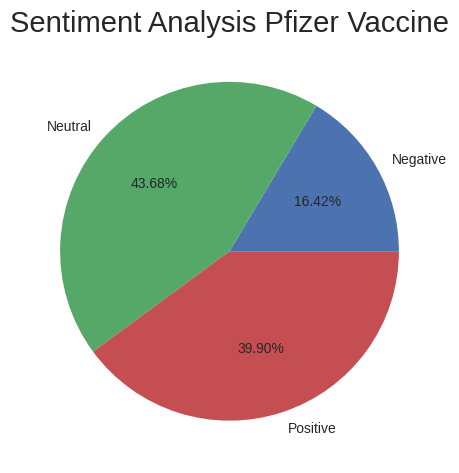

In [24]:
# visualize sentiment analysis
plt.rcParams["figure.figsize"] = (14,7)
plt.style.use("seaborn")
plt.pie(sentiment_group['id'], labels=sentiment_group['sentiment'], autopct='%.2f%%')
plt.title('Sentiment Analysis Pfizer Vaccine', fontsize=21)

In [25]:
# group by sentiment
favorites_group = df.groupby(['sentiment'])['favorites'].sum().reset_index()
favorites_group

,sentiment,favorites
0,Negative,8611
1,Neutral,31752
2,Positive,42404


<ipython-input-26-20edd67fb4ef>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<BarContainer object of 3 artists>

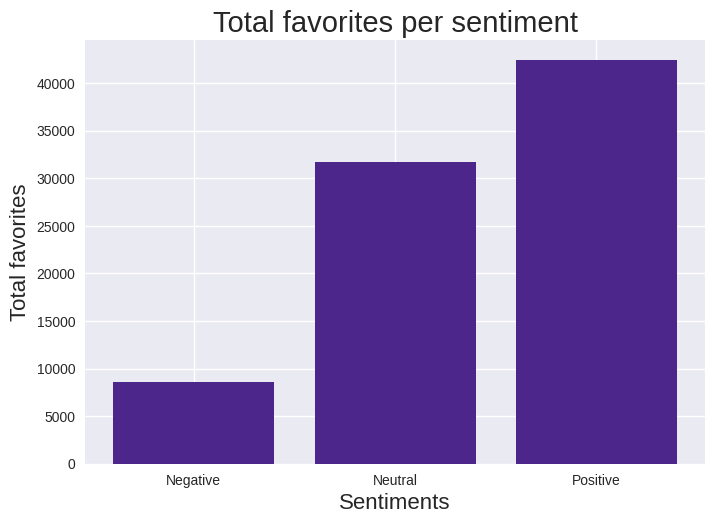

In [26]:
# add visualisation for favorites
plt.rcParams["figure.figsize"] = (13,8)
plt.style.use("seaborn")
plt.xlabel("Sentiments", fontsize=16)
plt.ylabel("Total favorites", fontsize=16)
plt.title("Total favorites per sentiment", fontsize=21)
plt.bar('sentiment','favorites', data= favorites_group, color='#4C268B')

In [27]:
# group by sentiment
retweets_group = df.groupby(['sentiment'])['retweets'].sum().reset_index()
retweets_group

,sentiment,retweets
0,Negative,2630
1,Neutral,6876
2,Positive,5486


<ipython-input-28-eb5b2466d460>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<BarContainer object of 3 artists>

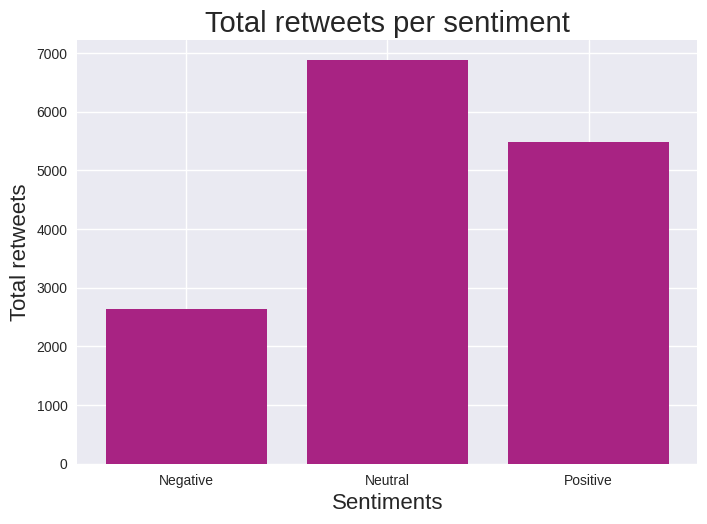

In [28]:
# add visualisation for retweets
plt.rcParams["figure.figsize"] = (13,8)
plt.style.use("seaborn")
plt.xlabel("Sentiments", fontsize=16)
plt.ylabel("Total retweets", fontsize=16)
plt.title("Total retweets per sentiment", fontsize=21)
plt.bar('sentiment','retweets', data= retweets_group, color='#A82383')

# Filtering the Visualisation of Sentiment analysis

In [29]:
# add dropdowns and output
yes_no = widgets.Dropdown(options=['Yes', 'No'], layout=Layout(width = '6%'))
my_output = widgets.Output()

filter_output = widgets.Output()

user_unique = widgets.Dropdown(options=df['user_verified'].unique())
source_unique = widgets.Dropdown(options=df['source'].unique())

# functions for on click
def filter_click(click):
    with filter_output:
        filter_output.clear_output()
        # add filter for visualisation of sentiment analysis
        my_data = df[(df['user_verified'] == user_unique.value) &
                                          (df['source'] == source_unique.value)]
        display(my_data)
        display(HTML('<br>'))
        display(HTML('<h1>Sentiment Analysis of Retweets about Pfizer Vaccine Table</h1>'))
        sentiment_group_filter = my_data.groupby(['sentiment'])['id'].count().reset_index()
        display(sentiment_group_filter)

        plt.rcParams["figure.figsize"] = (14,7)
        plt.style.use("seaborn")
        plt.pie(sentiment_group_filter['id'], labels=sentiment_group_filter['sentiment'], autopct='%.2f%%')
        plt.title('Sentiment Analysis about Pfizer Vaccine', fontsize=21)
        plt.show()

        display(HTML('<br>'))
        display(HTML('<h1>Total favorites per sentiment Table</h1>'))
        favorites_group_filter = my_data.groupby(['sentiment'])['favorites'].sum().reset_index()
        display(favorites_group_filter)

        plt.rcParams["figure.figsize"] = (13,8)
        plt.style.use("seaborn")
        plt.xlabel("Sentiments", fontsize=16)
        plt.ylabel("Total favorites", fontsize=16)
        plt.title("Total favorites per sentiment", fontsize=21)
        plt.bar('sentiment','favorites', data= favorites_group_filter, color='#4C268B')
        plt.show()

        display(HTML('<br>'))
        display(HTML('<h1>Total retweets per sentiment Table</h1>'))
        retweets_group_filter = my_data.groupby(['sentiment'])['retweets'].sum().reset_index()
        display(retweets_group_filter)

        plt.rcParams["figure.figsize"] = (13,8)
        plt.style.use("seaborn")
        plt.xlabel("Sentiments", fontsize=16)
        plt.ylabel("Total retweets", fontsize=16)
        plt.title("Total retweets per sentiment", fontsize=21)
        plt.bar('sentiment','retweets', data= retweets_group_filter, color='#A82383')
        plt.show()

def on_click(click):


    with my_output:
        my_output.clear_output()
        if yes_no.value == 'Yes':
            #print('yes')

            # add visualisation of sentiment analysis
            display(HTML('<br>'))
            display(HTML('<h1>Sentiment Analysis of Retweets about Pfizer Vaccine Table</h1>'))
            sentiment_group_all = df.groupby(['sentiment'])['id'].count().reset_index()
            display(sentiment_group_all)
            plt.rcParams["figure.figsize"] = (14,7)
            plt.style.use("seaborn")
            plt.pie(sentiment_group_all['id'], labels=sentiment_group_all['sentiment'], autopct='%.2f%%')
            plt.title('Sentiment Analysis about Pfizer Vaccine', fontsize=21)
            plt.show()
            display(HTML('<br>'))
            display(HTML('<h1>Total favorites per sentiment Table</h1>'))
            favorites_group_all = df.groupby(['sentiment'])['favorites'].sum().reset_index()
            display(favorites_group_all)
            plt.rcParams["figure.figsize"] = (13,8)
            plt.style.use("seaborn")
            plt.xlabel("Sentiments", fontsize=16)
            plt.ylabel("Total favorites", fontsize=16)
            plt.title("Total favorites per sentiment", fontsize=21)
            plt.bar('sentiment','favorites', data= favorites_group_all, color='#4C268B')
            plt.show()
            display(HTML('<br>'))
            display(HTML('<h1>Total retweets per sentiment Table</h1>'))
            retweets_group_all = df.groupby(['sentiment'])['retweets'].sum().reset_index()
            display(retweets_group_all)
            plt.rcParams["figure.figsize"] = (13,8)
            plt.style.use("seaborn")
            plt.xlabel("Sentiments", fontsize=16)
            plt.ylabel("Total retweets", fontsize=16)
            plt.title("Total retweets per sentiment", fontsize=21)
            plt.bar('sentiment','retweets', data= retweets_group_all, color='#A82383')
            plt.show()

        else:
            #print('no')


            # onclick
            filter_button = widgets.Button(description='Ok')
            filter_button.on_click(filter_click)

            # add layout
            display(widgets.VBox([widgets.Label('User Verified?'), user_unique, widgets.Label('Source'), source_unique, filter_button, filter_output], layout=Layout(max_height='4000px')))





# add button
ok_button = widgets.Button(description='Ok')

# onclick
ok_button.on_click(on_click)

# add layout
display(HTML('<h2>Display all:</h2>'))
widgets.VBox([yes_no, ok_button, my_output])



